# box plot 

# Load library

In [32]:
library(ggplot2)
library(Hmisc)
source("./utilis/utilis.R")
library(glue)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




# Set values & table names

In [2]:
threshold = 0.005
cutoff_column = 'padj'
data_df_path =  '../../output/cellNorm_one_way_ANOVA/simple_one_wayANOVA_hMinImp_cellNorm_classFil0.3_HILICpos_fullreport.csv'
meta_df_path =  '../../input/sequence_file/clean_deduplicated_meta_df.csv'
annot_df_path = '../../input/HILICpos_mzML/asari_project_output_727153535/Feature_annotation.tsv'

# Prepare the data

## Read and transform the data table and metadata table

In [5]:
df = read.csv(data_df_path, row.names = 1, sep = ',')
meta_df = read.csv(meta_df_path, row.names = 1)
annot_df = read.csv(annot_df_path, sep = '\t')

----

In [6]:
head(df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,⋯,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,85.0044,26.00,19.67,28.11,0,2003055,0.96,0.93,106,23,⋯,16.44929,15.64991,15.73690,15.31941,13.75765,16.00143,15.45488,16.25446,16.29809,16.52315
F100,130.9851,25.74,19.67,28.89,1936,3512837,1.00,0.97,217,24,⋯,16.22119,15.98205,15.93704,15.55304,13.12585,18.31586,18.61565,17.66144,17.55834,17.36552
F10000,393.2598,422.45,419.56,429.02,8551,3235844,1.00,0.90,148,17,⋯,15.59808,13.16461,13.16461,13.16461,18.15472,16.85217,18.32359,19.59158,16.12541,14.16461
F10004,393.2680,482.62,478.42,487.62,8553,1092807,0.91,0.97,51,11,⋯,16.86887,14.94052,14.94052,14.94052,18.17618,17.52588,18.64910,16.32349,15.94052,15.99033
F10006,409.2267,310.52,291.08,330.49,8979,10810474,1.00,0.95,161,24,⋯,19.18714,17.83219,17.71720,17.61735,19.80364,19.37064,19.52701,17.48562,18.17996,18.92816
F10007,409.2267,348.62,344.16,364.12,8979,2149563,1.00,0.90,69,24,⋯,13.61873,13.68497,12.38662,13.36999,14.18547,15.08910,15.69550,17.59065,16.99836,17.16847


In [7]:
grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE FALSE FALSE FALSE

In [8]:
data_df = df[grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))]

In [9]:
head(data_df)

,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,14.75765,16.52419,16.44929,15.64991,15.73690,15.31941,13.75765,16.00143,15.45488
F100,17.60134,17.42220,16.22119,15.98205,15.93704,15.55304,13.12585,18.31586,18.61565
F10000,16.00952,15.86099,15.59808,13.16461,13.16461,13.16461,18.15472,16.85217,18.32359
F10004,14.94052,14.94052,16.86887,14.94052,14.94052,14.94052,18.17618,17.52588,18.64910
F10006,18.82727,19.33012,19.18714,17.83219,17.71720,17.61735,19.80364,19.37064,19.52701
F10007,14.20953,14.40873,13.61873,13.68497,12.38662,13.36999,14.18547,15.08910,15.69550


----

In [10]:
head(meta_df)

,class,biological_samples,cell_number
,<chr>,<chr>,<int>
Naive_1,Naive,Yes,300
Naive_2,Naive,Yes,300
Naive_3,Naive,Yes,300
R5neg_1,R5neg,Yes,655
R5neg_2,R5neg,Yes,687
R5neg_3,R5neg,Yes,865


----

In [22]:
annot_df[1:10,]

,X.peak.id_number,mz,rtime,apex.scan.number.,X.EmpCpd.interim_id,X.EmpCpd.ion_relation,neutral_formula,neutral_formula_mass,name_1st_guess,matched_DB_shorts,matched_DB_records
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,F4,105.0378,29.94454,112,0,anchor,None,None,,,
2,F61,106.0411,29.41904,110,0,13C/12C,None,None,,,
3,F869,123.0485,30.20728,113,0,"anchor,+H2O",None,None,,,
4,F1028,124.0516,25.74057,96,0,"13C/12C,+H2O",None,None,,,
5,F19,117.0334,29.94454,112,1,anchor,C5H8ClN,117.034527,,,
6,F330,118.0412,30.20728,113,1,H,C5H8ClN,117.034527,,,
7,F835,136.0518,29.68179,111,1,"H,+H2O",C5H8ClN,117.034527,,,
8,F20,130.0874,31.78377,119,2,anchor,None,None,,,
9,F222,131.0908,31.25828,117,2,13C/12C,None,None,,,


In [12]:
lookUpAnnot <- function(annot_df,
                        FeatureID,
                        look4column = 'name_1st_guess') {
    output = annot_df[annot_df[,'X.peak.id_number'] == FeatureID,look4column]
    return(output)
}

In [23]:
lookUpAnnot(annot_df,'F159','name_1st_guess')

[1] "2-Chloromaleylacetate" ""

## Transform and merge data

In [26]:
source('./utilis/utilis.R')
transform_merge_data4violin <- function(df = df,
                                 meta_df = meta_df,
                                 class_column = 'class',
                                 cutoff_column = 'padj', 
                                 threshold = 0.05) {
    
    df_filt <- df[df[,cutoff_column] < 0.05,
              colnames(df)[grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))]] # 
    df_filt.T <- t(df_filt)
    # print(head(df_filt.T))
    merged_df = merge_by_rowName(meta_df,df_filt.T, all.y = TRUE)
    merged_df[,class_column] = factor(
        merged_df[,class_column],
        level = c('Naive',
                  'R5neg',
                  'R5pos')
    )
    return(merged_df)
}

In [27]:
merged_df <- transform_merge_data4violin(df = df,
                                         meta_df = meta_df,
                                         class_column = 'class',
                                         cutoff_column = 'padj', 
                                         threshold = 0.05)

In [28]:
colnames(merged_df)

[1] "class"              "biological_samples" "cell_number"       
   [4] "F10000"             "F10004"             "F10006"            
   [7] "F10014"             "F10016"             "F10027"            
  [10] "F10030"             "F10032"             "F10033"            
  [13] "F10036"             "F10037"             "F10039"            
  [16] "F10040"             "F10042"             "F10048"            
  [19] "F1005"              "F10053"             "F10057"            
  [22] "F10058"             "F10059"             "F10065"            
  [25] "F1007"              "F10070"             "F10071"            
  [28] "F10077"             "F10078"             "F10085"            
  [31] "F10086"             "F10088"             "F10093"            
  [34] "F10095"             "F10096"             "F10099"            
  [37] "F1011"              "F10114"             "F1012"             
  [40] "F10126"             "F10127"             "F10129"            
  [43] "F10130"             "F10131"             "F10132"            
  [46] "F10135"             "F10137"             "F1014"             
  [49] "F10144"             "F10145"             "F10147"            
  [52] "F10155"             "F10164"             "F10165"            
  [55] "F10168"             "F10169"             "F10176"            
  [58] "F10179"             "F10180"             "F10181"            
  [61] "F10186"             "F10187"             "F1019"             
  [64] "F10193"             "F10208"             "F10215"            
  [67] "F10216"             "F1022"              "F10223"            
  [70] "F10225"             "F1023"              "F10235"            
  [73] "F10236"             "F10237"             "F10240"            
  [76] "F10245"             "F10249"             "F10252"            
  [79] "F10254"             "F10259"             "F10260"            
  [82] "F10261"             "F10262"             "F10275"            
  [85] "F10278"             "F10280"             "F10292"            
  [88] "F10294"             "F10296"             "F10301"            
  [91] "F10302"             "F10307"             "F10309"            
  [94] "F10311"             "F10315"             "F10317"            
  [97] "F1032"              "F1033"              "F10333"            
 [100] "F10334"             "F10335"             "F10340"            
 [103] "F10363"             "F10364"             "F10372"            
 [106] "F1040"              "F10409"             "F10411"            
 [109] "F10427"             "F10440"             "F10447"            
 [112] "F10461"             "F10463"             "F10467"            
 [115] "F10471"             "F10479"             "F10480"            
 [118] "F10482"             "F10486"             "F10516"            
 [121] "F10518"             "F10519"             "F10520"            
 [124] "F10524"             "F10531"             "F10532"            
 [127] "F10540"             "F10547"             "F10553"            
 [130] "F10560"             "F10574"             "F10577"            
 [133] "F10578"             "F10584"             "F10587"            
 [136] "F10609"             "F10612"             "F10613"            
 [139] "F10614"             "F10617"             "F10620"            
 [142] "F10635"             "F10638"             "F10641"            
 [145] "F10642"             "F10643"             "F10645"            
 [148] "F10646"             "F10647"             "F10651"            
 [151] "F10653"             "F10664"             "F10665"            
 [154] "F10666"             "F10668"             "F10669"            
 [157] "F10670"             "F10672"             "F10678"            
 [160] "F10691"             "F10695"             "F10705"            
 [163] "F10707"             "F10708"             "F10709"            
 [166] "F10720"             "F10745"             "F10748"            
 [169] "F10757"             "F10761"             "F10773"            
 [172] "F1077

# Output directory

In [29]:
output_dir = "../../output//cellNorm_one_way_ANOVA/boxplot/"
dir.create(output_dir)

# Wrapper Function: plot a single box plot

In [43]:
box_plot <- function(long_df = merged_df,
                        x = 'class',
                        y = var,
                        xlab = xlab,
                        ylab = ylab,
                        fill_color = 'class',
                        fig_width = 8,
                        fig_height = 8,
                        text_size = 20,
                        legend_size = 20,
                        axis_title_size = 20,
                        output_dir = "",
                        pdf_prefix = 'test',
                        show_plot = TRUE) {
    
    options(repr.plot.width = fig_width, repr.plot.height = fig_height)

    p <- ggplot(long_df, aes_string(x = x, y = y, fill = fill_color)) + 
        geom_boxplot(outlier.shape = NA) +
        xlab(xlab) + ylab(ylab) + 
        geom_jitter(alpha = 1) +
        scale_fill_manual(values = c("#888888","#ff0000","#0000ff")) +  #

        # set transparency
        # https://ggplot2.tidyverse.org/reference/theme.html
        theme(
          panel.grid.major = element_line(colour = "grey50",linetype = "dashed", size = 0.2),
          panel.border = element_rect(fill = NA),
          #panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          axis.text = element_text(size = text_size, colour="black"),
          axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5, colour="black"),
          legend.text= element_text(size = legend_size),
          legend.title = element_text(size = legend_size),
          axis.title = element_text(size = axis_title_size)
        )
    if (show_plot == TRUE) {
        print(p) # display the plot
    } else {return(p)}

    if (length(output_dir)!=0) {
            ggsave(file.path(output_dir, paste0("ggplot_boxplot_",pdf_prefix,".pdf")), width = fig_width, height = fig_height)
        }
}

# Plot a single box plot

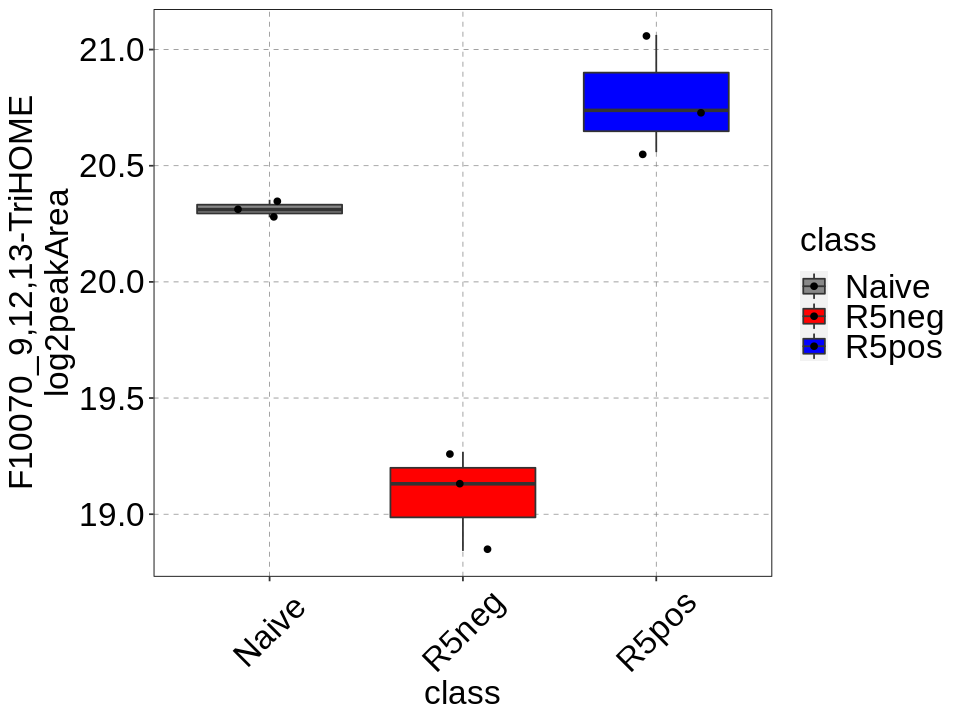

In [46]:
var <- sym('F10070')

metab_name <- lookUpAnnot(annot_df,var,'name_1st_guess')
box_plot(long_df = merged_df,
            x = 'class',
            y = var,
            xlab = 'class',
            ylab = glue('{var}_{metab_name}\nlog2peakArea'),
            fill_color = 'class',
            fig_width = 8,
            fig_height = 6,
            text_size = 20,
            legend_size = 20,
            axis_title_size = 20,
            output_dir = output_dir,
            pdf_prefix = 'test')

# Wrapper for plotting out multiple

In [34]:
head(merged_df)

,class,biological_samples,cell_number,F10000,F10004,F10006,F10014,F10016,F10027,F10030,⋯,F9968,F9969,F997,F9970,F9975,F9981,F9990,F9994,F9996,F9998
,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Naive_1,Naive,Yes,300,16.00952,14.94052,18.82727,19.93533,17.14956,21.45314,19.33468,⋯,19.30704,19.59955,20.76818,26.38091,16.39279,19.33981,13.77674,16.45284,19.87671,18.89954
Naive_2,Naive,Yes,300,15.86099,14.94052,19.33012,20.74506,16.14956,21.53978,20.45553,⋯,19.33234,19.83664,20.22153,26.38529,18.12057,19.61095,13.77674,16.60760,20.40975,18.56842
Naive_3,Naive,Yes,300,15.59808,16.86887,19.18714,20.88389,16.14956,21.51471,22.35136,⋯,19.68446,19.88882,20.05836,26.31067,19.28105,19.44196,13.77674,15.92995,19.79409,18.45521
R5neg_1,R5neg,Yes,655,13.16461,14.94052,17.83219,19.84817,16.14956,20.45891,17.81868,⋯,18.45641,18.43358,17.38838,25.18121,13.72270,18.43638,14.77674,15.30096,18.68959,16.25508
R5neg_2,R5neg,Yes,687,13.16461,14.94052,17.71720,19.63582,16.14956,20.37345,17.45855,⋯,18.42570,18.17267,18.25643,25.00173,14.72270,18.47033,16.75670,15.01667,18.16679,16.25508
R5neg_3,R5neg,Yes,865,13.16461,14.94052,17.61735,19.43553,16.14956,20.14892,17.66258,⋯,18.23021,18.08022,17.43149,24.70339,13.72270,18.45899,16.84277,15.63659,17.16587,16.25508


In [35]:
listOfFeatures = colnames(merged_df)[grepl('F[0-9]',colnames(merged_df))] # 

In [36]:
# install.packages("ggpubr")
library(ggpubr)

In [47]:
fig_l = list()
for (i in 1:length(listOfFeatures)) {

    pdf_prefix = paste('test',cutoff_column,threshold, sep = "_") # 

    featID <- listOfFeatures[[i]]
    metab_name <- lookUpAnnot(annot_df,sym(featID),'name_1st_guess')

    fig_l[[i]] <- box_plot(long_df = merged_df,
                            x = 'class', #
                            y = sym(featID),
                            xlab = 'class', # 
                            ylab = glue('{featID}_{metab_name}\nlog2peakArea'),
                            fill_color = 'class',
                            fig_width = 4,
                            fig_height = 4,
                            text_size = 8, # important in report multiple ones.
                            legend_size = 8,
                            axis_title_size = 6,
                            output_dir = NULL, # no need to define, this is for single plot
                            pdf_prefix = NULL, # no need to define, this is for single plot
                            show_plot = FALSE)
                    }
multi.page <- ggarrange(plotlist = fig_l,
                        nrow = 3, ncol = 2)
ggexport(multi.page, filename = file.path(output_dir, 
                                          paste0("ggplot_multi_ggplot_",
                                                 pdf_prefix,
                                                 ".pdf")))


# library(ggpubr)
# 
# my_comparisons = list( c("0.5", "1"), c("1", "2"), c("0.5", "2") )
# 
# ggboxplot(ToothGrowth, x = "dose", y = "len",
#           color = "dose", palette = "jco")+ 
#   stat_compare_means(comparisons = my_comparisons, label.y = c(29, 35, 40))+
#   stat_compare_means(label.y = 45)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'F10524_[(4-{5,14-dihydroxy-3-methoxy-8,17-dioxatetracyclo[8.7.0.0²,⁷.0¹¹,¹⁶]heptadeca-1(10),2(7),3,5,11(16),12,14-heptaen-4-yl}-2-methylbut-2-en-1-yl)oxy]sulfonic acid' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'F10524_[(4-{5,14-dihydroxy-3-methoxy-8,17-dioxatetracyclo[8.7.0.0²,⁷.0¹¹,¹⁶]heptadeca-1(10),2(7),3,5,11(16),12,14-heptaen-4-yl}-2-methylbut-2-en-1-yl)oxy]sulfonic acid' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'F10524_[(4-{5,14-dihydroxy-3-methoxy-8,17-dioxatetracyclo[8.7.0.0²,⁷.0¹¹,¹⁶]heptadeca-1(10),2(7),3,5,11(16),12,14-heptaen-4-yl}-2-methylbut-2-en-1-yl)oxy]sulfonic acid' in 'mbcsToSbcs': dot substituted for <b7>”
Warning message in grid.Call(C_textBounds, as.